<a href="https://colab.research.google.com/github/lakshu014/Dataset-Prediction/blob/main/Basemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geographic Data with Basemap


Basemap allows you to create map plots in python. It extends matplotlib's functionality by adding geographical projections and some datasets for plotting coast lines and political boundaries, among other things

In [ ]:
!pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Once you have the Basemap toolkit installed and imported, geographic plots are just a few lines away (the graphics in the following also requires the ``PIL`` package in Python 2, or the ``pillow`` package in Python 3):

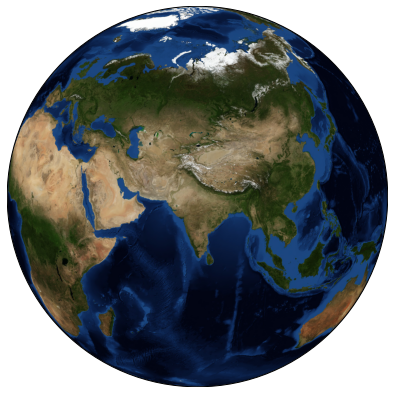

In [ ]:
plt.figure(figsize=(7, 7))
m = Basemap(projection='ortho', resolution=None, lat_0=27, lon_0=77)
m.bluemarble(scale=1);

The meaning of the arguments to ``Basemap`` will be discussed momentarily.

The useful thing is that the globe shown here is not a mere image; it is a fully-functioning Matplotlib axes that understands spherical coordinates and which allows us to easily overplot data on the map!
For example, we can use a different map projection, zoom-in to North America and plot the location of Seattle.
We'll use an etopo image (which shows topographical features both on land and under the ocean) as the map background:

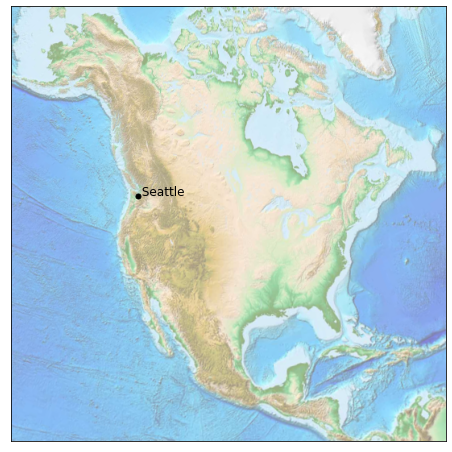

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

This gives you a brief glimpse into the sort of geographic visualizations that are possible with just a few lines of Python.
We'll now discuss the features of Basemap in more depth, and provide several examples of visualizing map data.
Using these brief examples as building blocks, you should be able to create nearly any map visualization that you desire.

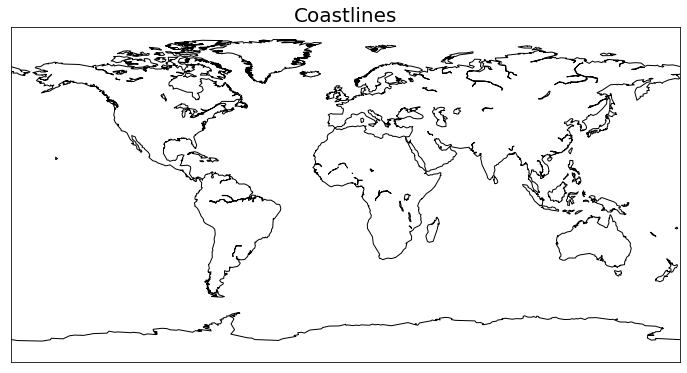

In [ ]:
#For drawing coastlines
fig = plt.figure(figsize = (12,12))
m = Basemap()
m.drawcoastlines()
plt.title("Coastlines", fontsize=20)
plt.show()

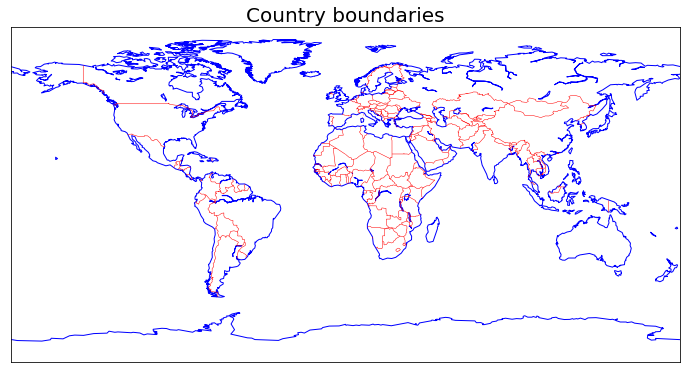

In [ ]:
#To draw countries
fig = plt.figure(figsize = (12,12))
m = Basemap()
m.drawcoastlines(linewidth=1.0, linestyle='solid', color='blue')
m.drawcountries(color='red')
plt.title("Country boundaries", fontsize=20)
plt.show()

## Map Projections

The first thing to decide when using maps is what projection to use.
These projections have been developed over the course of human history, and there are a lot of choices!
Depending on the intended use of the map projection, there are certain map features (e.g., direction, area, distance, shape, or other considerations) that are useful to maintain.

The Basemap package implements several dozen such projections, all referenced by a short format code.
Here we'll briefly demonstrate some of the more common ones.

We'll start by defining a convenience routine to draw our world map along with the longitude and latitude lines:

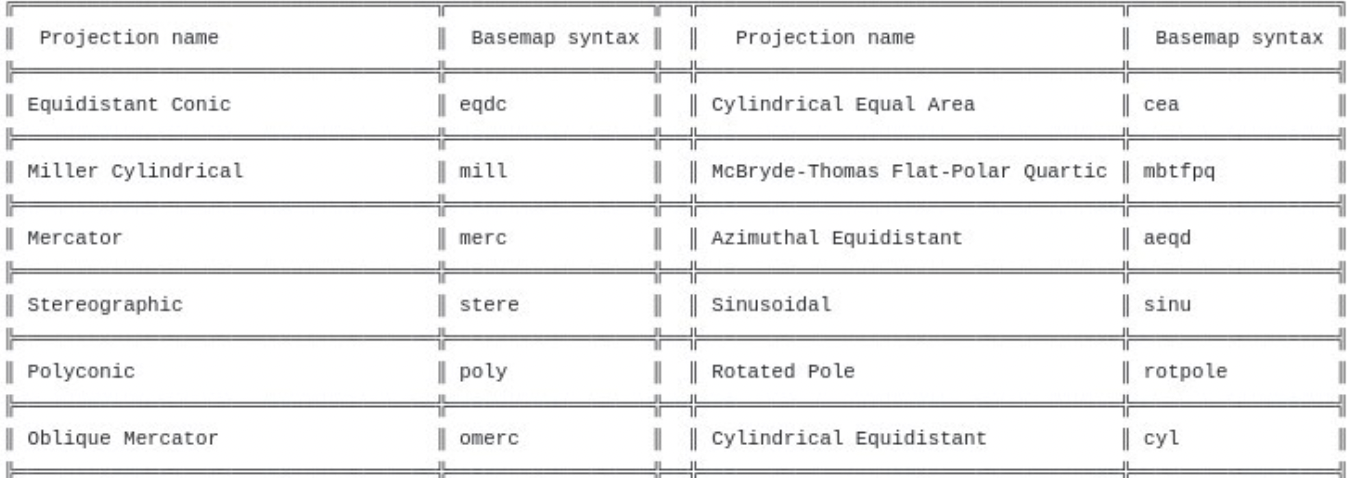

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)

    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Cylindrical projections

The simplest of map projections are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively.
This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles.
The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles.
In the following figure we show an example of the *equidistant cylindrical projection*, which chooses a latitude scaling that preserves distances along meridians.
Other cylindrical projections are the Mercator (``projection='merc'``) and the cylindrical equal area (``projection='cea'``) projections.

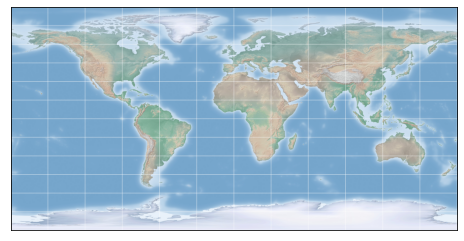

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

### Pseudo-cylindrical projections

Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection.
The Mollweide projection (``projection='moll'``) is one common example of this, in which all meridians are elliptical arcs.
It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area.
Other pseudo-cylindrical projections are the sinusoidal (``projection='sinu'``) and Robinson (``projection='robin'``) projections.

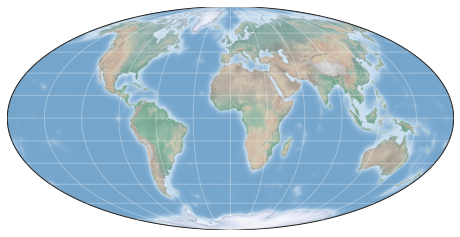

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

The extra arguments to Basemap here refer to the central latitude (``lat_0``) and longitude (``lon_0``) for the desired map.

### Perspective projections

Perspective projections are constructed using a particular choice of perspective point, similar to if you photographed the Earth from a particular point in space (a point which, for some projections, technically lies within the Earth!).
One common example is the orthographic projection (``projection='ortho'``), which shows one side of the globe as seen from a viewer at a very long distance. As such, it can show only half the globe at a time.
Other perspective-based projections include the gnomonic projection (``projection='gnom'``) and stereographic projection (``projection='stere'``).
These are often the most useful for showing small portions of the map.

Here is an example of the orthographic projection:

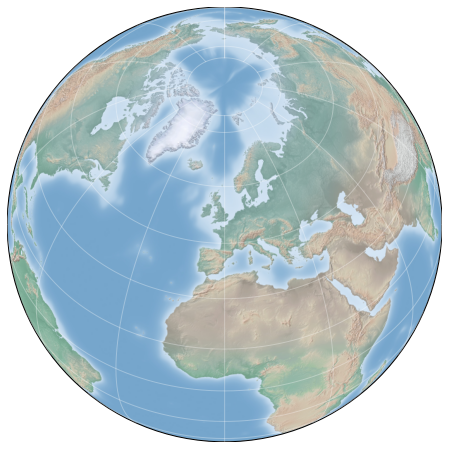

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### Conic projections

A Conic projection projects the map onto a single cone, which is then unrolled.
This can lead to very good local properties, but regions far from the focus point of the cone may become very distorted.
One example of this is the Lambert Conformal Conic projection (``projection='lcc'``), which we saw earlier in the map of North America.
It projects the map onto a cone arranged in such a way that two standard parallels (specified in Basemap by ``lat_1`` and ``lat_2``) have well-represented distances, with scale decreasing between them and increasing outside of them.
Other useful conic projections are the equidistant conic projection (``projection='eqdc'``) and the Albers equal-area projection (``projection='aea'``).
Conic projections, like perspective projections, tend to be good choices for representing small to medium patches of the globe.

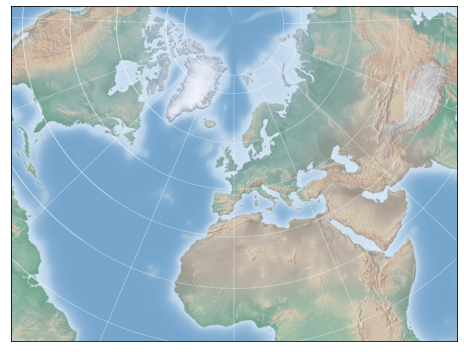

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

## Drawing a Map Background

Earlier we saw the ``bluemarble()`` and ``shadedrelief()`` methods for projecting global images on the map, as well as the ``drawparallels()`` and ``drawmeridians()`` methods for drawing lines of constant latitude and longitude.
The Basemap package contains a range of useful functions for drawing borders of physical features like continents, oceans, lakes, and rivers, as well as political boundaries such as countries and US states and counties.
The following are some of the available drawing functions that you may wish to explore using IPython's help features:

- **Physical boundaries and bodies of water**
  - ``drawcoastlines()``: Draw continental coast lines
  - ``drawlsmask()``: Draw a mask between the land and sea, for use with projecting images on one or the other
  - ``drawmapboundary()``: Draw the map boundary, including the fill color for oceans.
  - ``drawrivers()``: Draw rivers on the map
  - ``fillcontinents()``: Fill the continents with a given color; optionally fill lakes with another color

- **Political boundaries**
  - ``drawcountries()``: Draw country boundaries
  - ``drawstates()``: Draw US state boundaries
  - ``drawcounties()``: Draw US county boundaries

- **Map features**
  - ``drawgreatcircle()``: Draw a great circle between two points
  - ``drawparallels()``: Draw lines of constant latitude
  - ``drawmeridians()``: Draw lines of constant longitude
  - ``drawmapscale()``: Draw a linear scale on the map

- **Whole-globe images**
  - ``bluemarble()``: Project NASA's blue marble image onto the map
  - ``shadedrelief()``: Project a shaded relief image onto the map
  - ``etopo()``: Draw an etopo relief image onto the map
  - ``warpimage()``: Project a user-provided image onto the map

For the boundary-based features, you must set the desired resolution when creating a Basemap image.
The ``resolution`` argument of the ``Basemap`` class sets the level of detail in boundaries, either ``'c'`` (crude), ``'l'`` (low), ``'i'`` (intermediate), ``'h'`` (high), ``'f'`` (full), or ``None`` if no boundaries will be used.
This choice is important: setting high-resolution boundaries on a global map, for example, can be *very* slow.



## Plotting Data on Maps



Some of these map-specific methods are:

- ``contour()``/``contourf()`` : Draw contour lines or filled contours
- ``imshow()``: Draw an image
- ``pcolor()``/``pcolormesh()`` : Draw a pseudocolor plot for irregular/regular meshes
- ``plot()``: Draw lines and/or markers.
- ``scatter()``: Draw points with markers.
- ``quiver()``: Draw vectors.
- ``barbs()``: Draw wind barbs.
- ``drawgreatcircle()``: Draw a great circle.




In [ ]:
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.1 MB 61 kB/s 


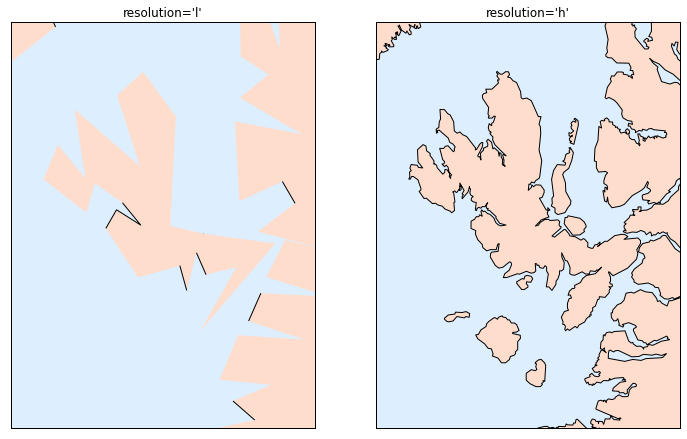

In [ ]:
#Scotland's small map
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

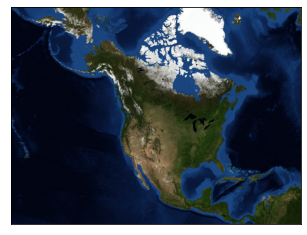

In [ ]:
#NASA's blue marble image
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()